In [ ]:
!pip install opendatasets
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: import torchvision.transforms as transforms
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:06<00:00, 188MB/s]


In [27]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchvision

In [2]:
device = 'cuda'

In [3]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Lambda(lambda t: (t * 2) - 1)
])

In [4]:
dataset = datasets.ImageFolder(root = '/content/dogs-vs-cats/train', transform = transform)
loader = DataLoader(dataset, batch_size = 128, shuffle = True)
dataset_test = datasets.ImageFolder(root = "/content/dogs-vs-cats/test", transform = transform)
loader_test = DataLoader(dataset_test, batch_size = 128, shuffle = True)

In [5]:
class ConvClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #256x256
        self.conv1 = self.block(3,64)
        #128x128
        self.conv2 = self.block(64,128)
        #64x64
        self.conv3 = self.block(128,256)
        #32x32
        self.conv4 = self.block(256,512)
        #8x8
        self.conv5 = nn.Conv2d(512,1,8,2,0)
        #1x1

    def block(self, in_features, out_features):
        return nn.Sequential(
            nn.Conv2d(in_features, out_features, 4, 2, 1),
            nn.BatchNorm2d(out_features),
            nn.ReLU(),
        )

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return torch.sigmoid(self.conv5(x))

In [6]:
classifier = ConvClassifier().to(device)

In [7]:
opt = optim.Adam(classifier.parameters(),lr = 3e-4, betas = (0.9,0.999))

In [8]:
criterion = nn.BCELoss()

In [10]:
for epoch in range(20):

    for batch_idx, (real, real_classes) in enumerate(tqdm(loader)):
        real = real.to(device)
        real_classes = real_classes.to(device)
        result = classifier(real).view(-1)
        loss = criterion(result.type(torch.float32), real_classes.type(torch.float32))
        classifier.zero_grad()
        loss.backward()
        opt.step()

    indicator = 0
    with torch.no_grad():
        stat = 0
        for bach_idx, (real, real_classes) in enumerate(tqdm(loader_test)):
            real = real.to(device)
            real_classes = real_classes.to(device)
            pred_classes = classifier(real).view(-1)
            stat += torch.sum(torch.abs(real_classes - pred_classes))
        print(1 - stat / len(dataset_test))

100%|██████████| 40/40 [00:13<00:00,  3.05it/s]


tensor(0.6579, device='cuda:0')


100%|██████████| 40/40 [00:15<00:00,  2.61it/s]


tensor(0.7275, device='cuda:0')


100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


tensor(0.7322, device='cuda:0')


100%|██████████| 40/40 [00:14<00:00,  2.70it/s]


tensor(0.7714, device='cuda:0')


100%|██████████| 40/40 [00:15<00:00,  2.65it/s]


tensor(0.7800, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.01it/s]


tensor(0.8032, device='cuda:0')


100%|██████████| 40/40 [00:20<00:00,  1.99it/s]


tensor(0.8182, device='cuda:0')


100%|██████████| 40/40 [00:12<00:00,  3.09it/s]


tensor(0.8247, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.04it/s]


tensor(0.8314, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.01it/s]


tensor(0.8380, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.03it/s]


tensor(0.8383, device='cuda:0')


100%|██████████| 40/40 [00:12<00:00,  3.09it/s]


tensor(0.8414, device='cuda:0')


100%|██████████| 40/40 [00:15<00:00,  2.55it/s]


tensor(0.8404, device='cuda:0')


100%|██████████| 40/40 [00:16<00:00,  2.45it/s]


tensor(0.8391, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.04it/s]


tensor(0.8428, device='cuda:0')


100%|██████████| 40/40 [00:17<00:00,  2.26it/s]


tensor(0.8428, device='cuda:0')


100%|██████████| 40/40 [00:13<00:00,  3.05it/s]


tensor(0.8442, device='cuda:0')


100%|██████████| 40/40 [00:14<00:00,  2.74it/s]


tensor(0.8451, device='cuda:0')


100%|██████████| 40/40 [00:12<00:00,  3.10it/s]


tensor(0.8455, device='cuda:0')


100%|██████████| 40/40 [00:14<00:00,  2.74it/s]

tensor(0.8457, device='cuda:0')


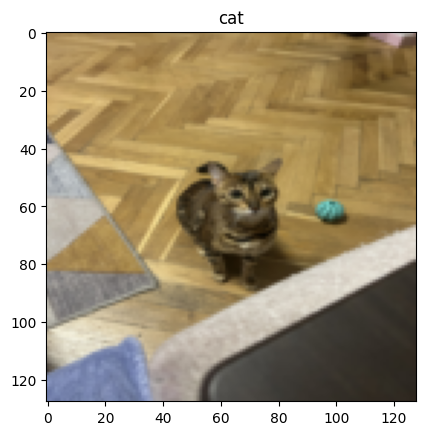

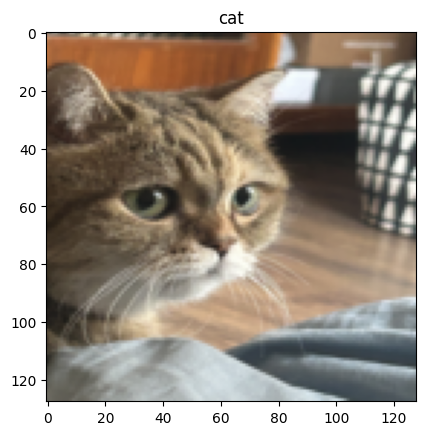

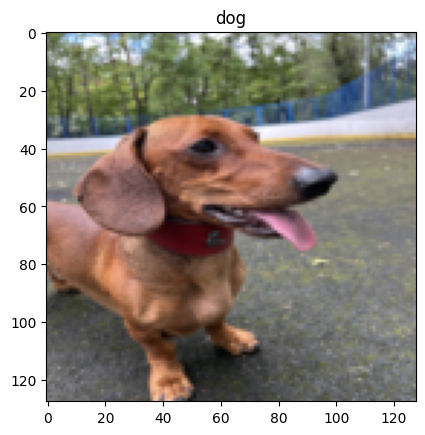

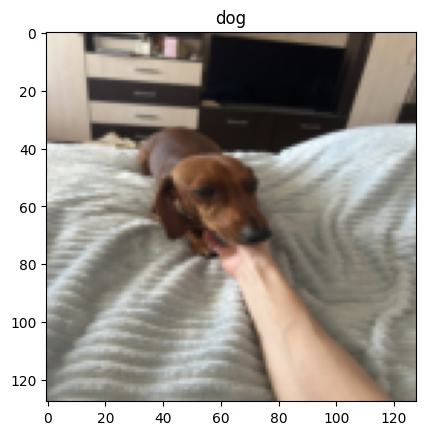

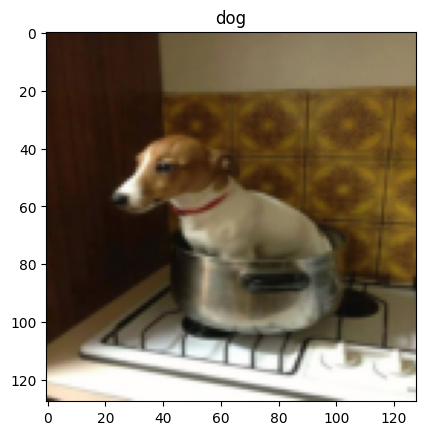

In [31]:
from PIL import Image
from matplotlib.pyplot import imshow, show, title

cat1 = Image.open("/content/cat1.jpeg")
cat2 = Image.open("/content/cat2.jpeg")
dog1 = Image.open("/content/dog1.jpeg")
dog2 = Image.open("/content/dog2.jpeg")
funnydog = Image.open("/content/funnydog.jpeg")
imgs = [cat1, cat2, dog1, dog2, funnydog]

back_transformation = transforms.Lambda(lambda t: (t + 1) / 2)

for i in range(len(imgs)):
    img = imgs[i]
    transformed_img = transform(img).to(device)
    if i != 4:
        transformed_img = torchvision.transforms.functional.rotate(transformed_img,270)
    transformed_img = transformed_img[None,:,:,:]
    result = classifier(transformed_img)
    title("dog" if result>0.5 else "cat")
    back_transformed_img = back_transformation(transformed_img[0,:,:,:])
    imshow(back_transformed_img.to("cpu").permute(1,2,0))
    show()

In [32]:
torch.save(classifier, "/content/classifier.pt")